In [4]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from UDFManager import *

plt.style.use('presentation')

In [2]:
"""
shear_rate = 0.05

all_omegas:
    x-axis: B1
    y-axis: gammadot
"""
all_omegas = pd.DataFrame(np.zeros((6, 7)), index=[5, 6, 7, 8, 9, 10], columns=[0, 5, 6, 7, 8, 9, 10])
all_omegapergammadot = pd.DataFrame(np.zeros((6, 7)), index=[5, 6, 7, 8, 9, 10], columns=[0, 5, 6, 7, 8, 9, 10])
for i in tqdm([0, 5, 6, 7, 8, 9, 10]):
    B1 = i * 0.01
    for j in range(5, 11):
        gammadot = j * 0.01
        uobj = UDFManager(f'gammadot/{j:0=3}/B1/{i:0=3}/output.udf')
        nt = uobj.totalRecord()

        omegas = np.zeros(nt, dtype=np.float64)
        for n in range(nt):
            uobj.jump(n)
            omegas[n] = uobj.get("Particles[].omega.z")[0]
        all_omegas.at[j, i] = np.mean(omegas[100:])
        all_omegapergammadot.at[j, i] = np.mean(omegas[100:]) / gammadot

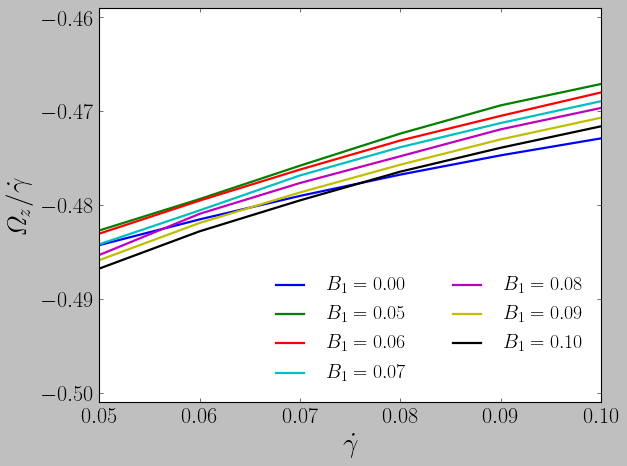

In [6]:
xticks = all_omegapergammadot.index.values * 0.01
yticks = np.arange(-0.50, -0.45, 0.01)
# yticks_str = [f'{i:0=0.2f}' for i in np.arange(-0.54, -0.44, 0.01)]

plt.xticks(xticks, fontsize=20)
plt.yticks(yticks, fontsize=20)
plt.xlim(0.05, 0.10)
plt.ylim(-0.501, -0.459)
plt.xlabel(r'$\it{\dot{\gamma}}$', fontsize=25)
plt.ylabel(r'$\it{\Omega_z} / \it{\dot{\gamma}}$', fontsize=25)

for i in [0, 5, 6, 7, 8, 9, 10]:
    B1 = i * 0.01
    plt.plot(xticks, all_omegapergammadot[i], label=f'$B_1={B1:0=0.2f}$')
plt.legend(ncol=2, loc='lower right')
plt.tight_layout()
plt.savefig('../figs/sim01/00.png')